In [52]:
import ROOT
import json
print(ROOT.gROOT.GetVersion(),ROOT.xRooFit.GetVersion())

6.37.01 v0.0.1-14-g1b8b81e


In [53]:
n_obs = 1.0
n_bkg = 0.5
n_sig = 0.5

In [54]:
w = ROOT.xRooNode("RooWorkspace","combined","my workspace")
w["pdfs/simPdf/SR"].SetXaxis(1,0,1) 
w["pdfs/simPdf/SR/bkg"].SetBinContent(1,n_bkg)
w["pdfs/simPdf/SR/sig"].SetBinContent(1,n_sig)
w["pdfs/simPdf/SR"].SetBinData(1,n_obs)

w["pdfs/simPdf/SR/sig"].coefs().Multiply("mu","norm")
w.poi().Add("mu")

xRooNode<RooRealVar> mu

Info in <xRooNode::Add>: Created pdf RooSimultaneous::simPdf in workspace combined
Info in <xRooNode::Vary>: Created channel RooProdPdf::simPdf_SR in model simPdf
Info in <xRooNode::Multiply>: Created RooRealSumPdf::simPdf_SR_samples in channel simPdf_SR
Info in <xRooNode::Add>: Created SimpleDensity factor RooHistFunc::simPdf_SR_samples_bkg for simPdf_SR_samples
Info in <xRooNode::Add>: Created SimpleDensity factor RooHistFunc::simPdf_SR_samples_sig for simPdf_SR_samples
[#1] INFO:ObjectHandling -- RooWorkspace::import(combined) importing dataset obsData
Info in <xRooNode::Multiply>: Scaled 1 by new norm factor mu


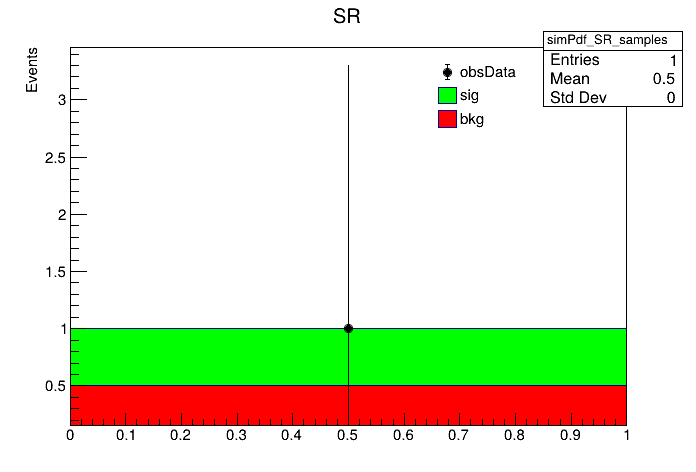

In [55]:
%jsroot off
w["pdfs/simPdf"].Draw("E")
ROOT.gPad.GetCanvas().Draw()

{
"-1" => 3.500000 +/- 0.200000
"-2" => 2.300000 +/- 0.120000
"0" => 5.800000 +/- 0.400000
"1" => 9.800000 +/- 0.400000
"2" => 16.200000 +/- 0.600000
"obs" => 7.200000 +/- 0.600000
}

Info in <xRooHypoSpace::scan>: No physical range set for mu, setting to [0,inf]
[#1] INFO:Eval -- RooRealVar::setRange(mu) new range named 'physical' created with bounds [0,inf]
Info in <xRooHypoSpace::scan>: No altVal set for mu, setting to 0
Info in <xRooHypoSpace::AddPoint>: Added new point @ mu=0
Info in <xRooHypoSpace::AddPoint>: Added new point @ mu=2
Info in <xRooHypoSpace::findlimit>: pcls exp0 -- Testing new point @ mu=6.14382 (delta=inf)
Info in <xRooHypoSpace::AddPoint>: Added new point @ mu=6.14382
Info in <xRooHypoSpace::findlimit>: pcls exp0 -- Testing new point @ mu=5.38302 (delta=-3.75474)
Info in <xRooHypoSpace::AddPoint>: Added new point @ mu=5.38302
Info in <xRooHypoSpace::findlimit>: pcls exp+1 -- Testing new point @ mu=11.0174 (delta=inf)
Info in <xRooHypoSpace::AddPoint>: Added new p

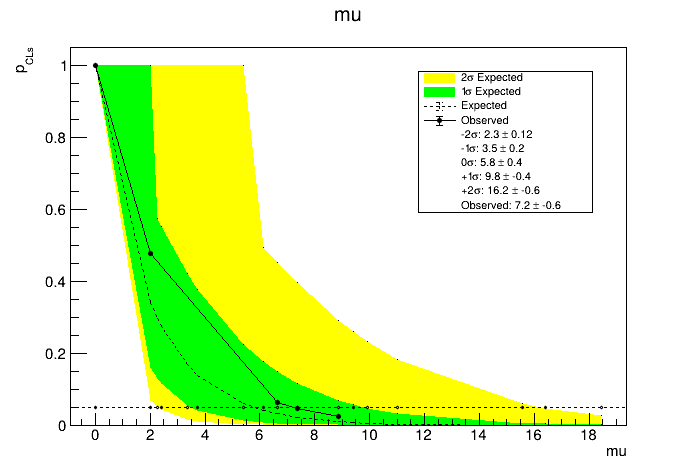

In [56]:
hs = w["pdfs/simPdf"].nll("obsData").hypoSpace("mu")
hs.scan("cls")
print(hs.limits())
hs.Draw()
ROOT.gPad.GetCanvas().Draw()

{
"-1" => nan +/- 0.000000
"-2" => nan +/- 0.000000
"0" => nan +/- 0.000000
"1" => nan +/- 0.000000
"2" => nan +/- 0.000000
"obs" => nan +/- 0.000000
}

Info in <xRooHypoSpace::scan>: No altVal set for mu, setting to 0
[#1] INFO:Eval -- RooRealVar::setRange(mu) new range named 'scan' created with bounds [1,1]
Info in <xRooHypoSpace::scan>: Using mu scan range: 1 - 1
Info in <xRooHypoSpace::AddPoint>: Added new point @ mu=1
Info in <xRooHypoSpace::scan>: Using mu scan range: 1 - 1
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp0 @ mu=1
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp+1 @ mu=1
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp+2 @ mu=1
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp-1 @ mu=1
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp-2 @ mu=1
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp @ mu=1
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp @ mu=1
Er

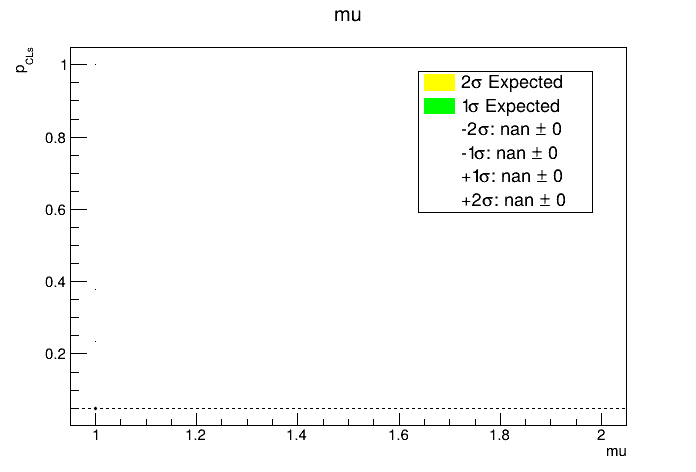

In [57]:
# Try to get cls limit for mu = 1
hs = w["pdfs/simPdf"].nll("obsData").hypoSpace("mu")
hs.scan("cls", 1, 1, 1)
print(hs.limits())
hs.Draw()
ROOT.gPad.GetCanvas().Draw()
# Fit Fails

In [51]:
# Set mu to be constant 1
w.poi()[0].setVal(1) 
w.poi()[0].setConstant(True) 

fr = w["pdfs/simPdf/SR"].nll("obsData").hypoSpace().limits()


Info in <xRooHypoSpace::scan>: Using default precision of 10% for auto-scan
Info in <xRooHypoSpace::scan>: No altVal set for mu, setting to 0
Info in <xRooHypoSpace::scan>: Using mu scan range: 1 - 1
Info in <xRooHypoSpace::AddPoint>: Added new point @ mu=1
[#0] ERROR:DataHandling -- Error in RooAbsReal::setData(): only resetting with same-structured data is supported.
[#0] ERROR:DataHandling -- Error in RooAbsReal::setData(): only resetting with same-structured data is supported.
[#0] ERROR:DataHandling -- Error in RooAbsReal::setData(): only resetting with same-structured data is supported.
[#0] ERROR:DataHandling -- Error in RooAbsReal::setData(): only resetting with same-structured data is supported.
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp0 @ mu=1
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp+1 @ mu=1
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp+2 @ mu=1
Error in <xRooHypoSpace::findlimit>: Problem evaluating pcls exp-